# Muhahaha

In [6]:
from model import *
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import *
from sklearn.metrics import silhouette_score
import gmaps
import gmaps.datasets
from plotting import *

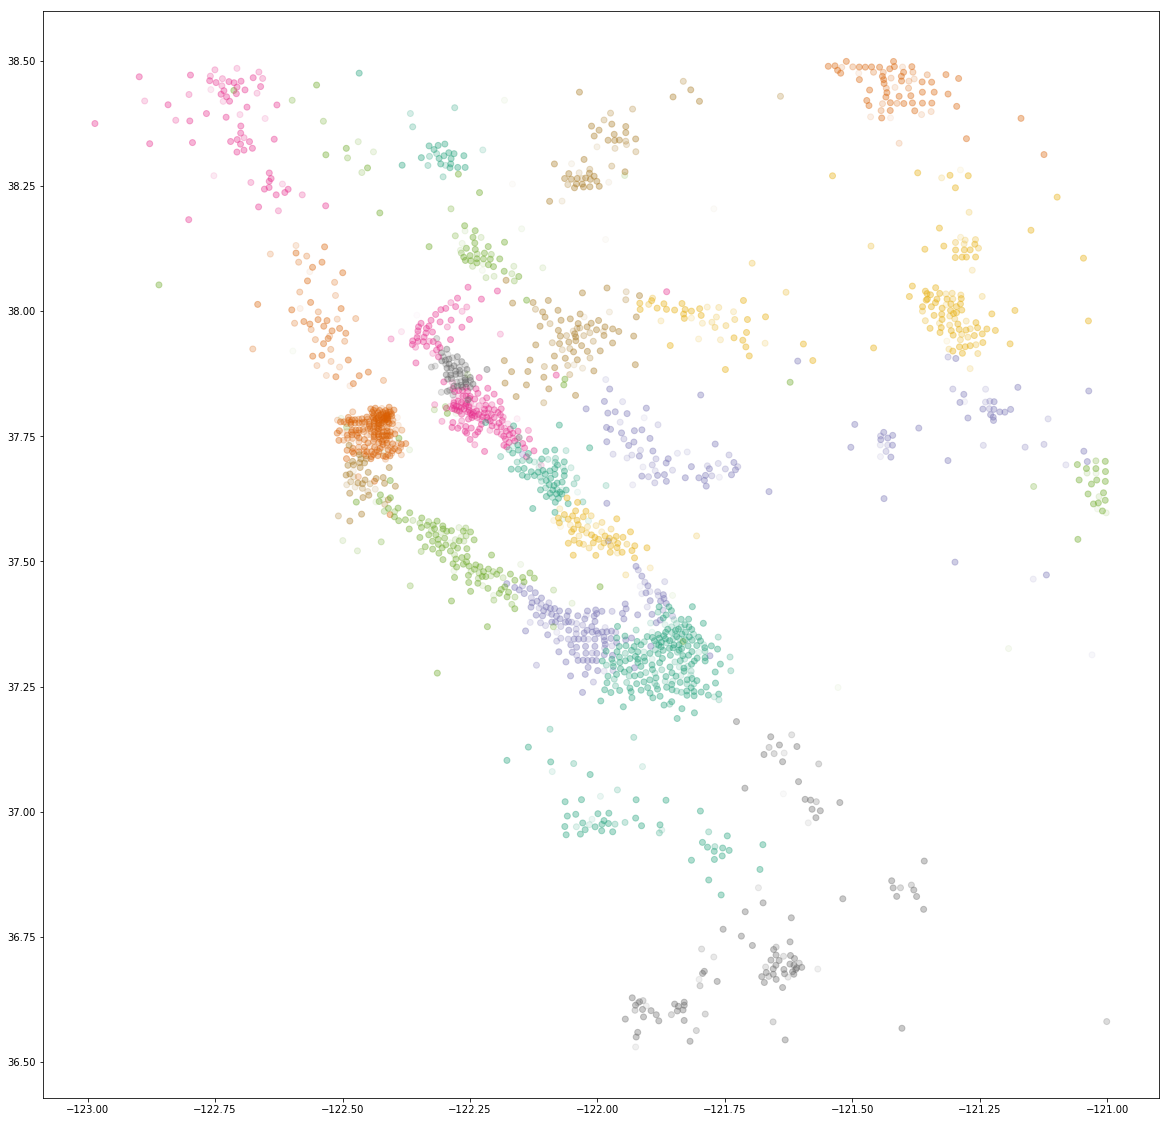

In [3]:
plot_bayarea(dist_method='absolute', link_method='ward', k=25, alpha=0.7)

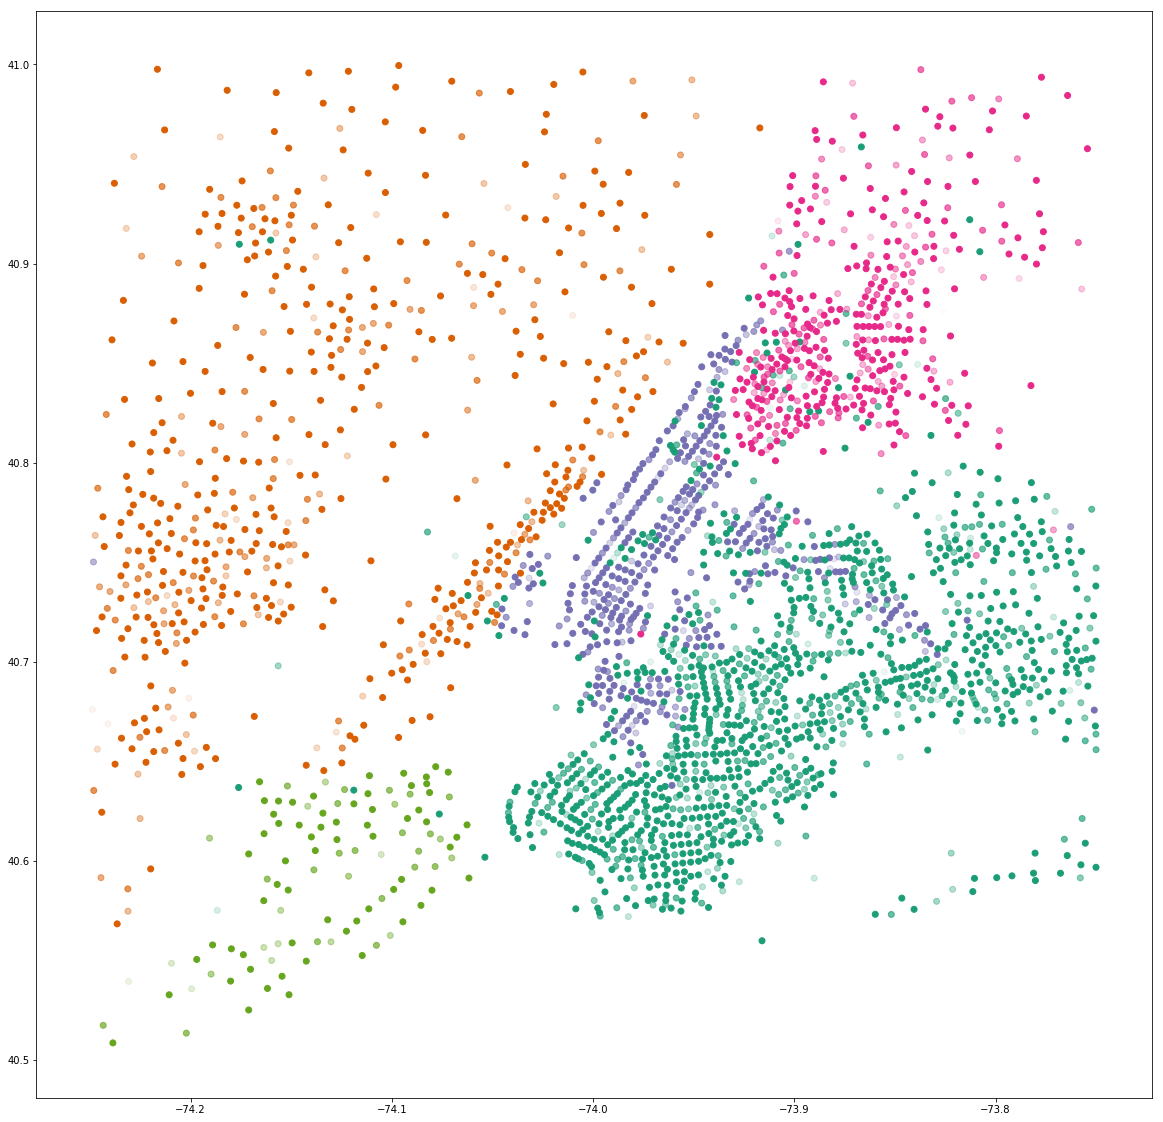

In [5]:
plot_nyc(dist_method='absolute', link_method='ward', k=5, alpha=2)

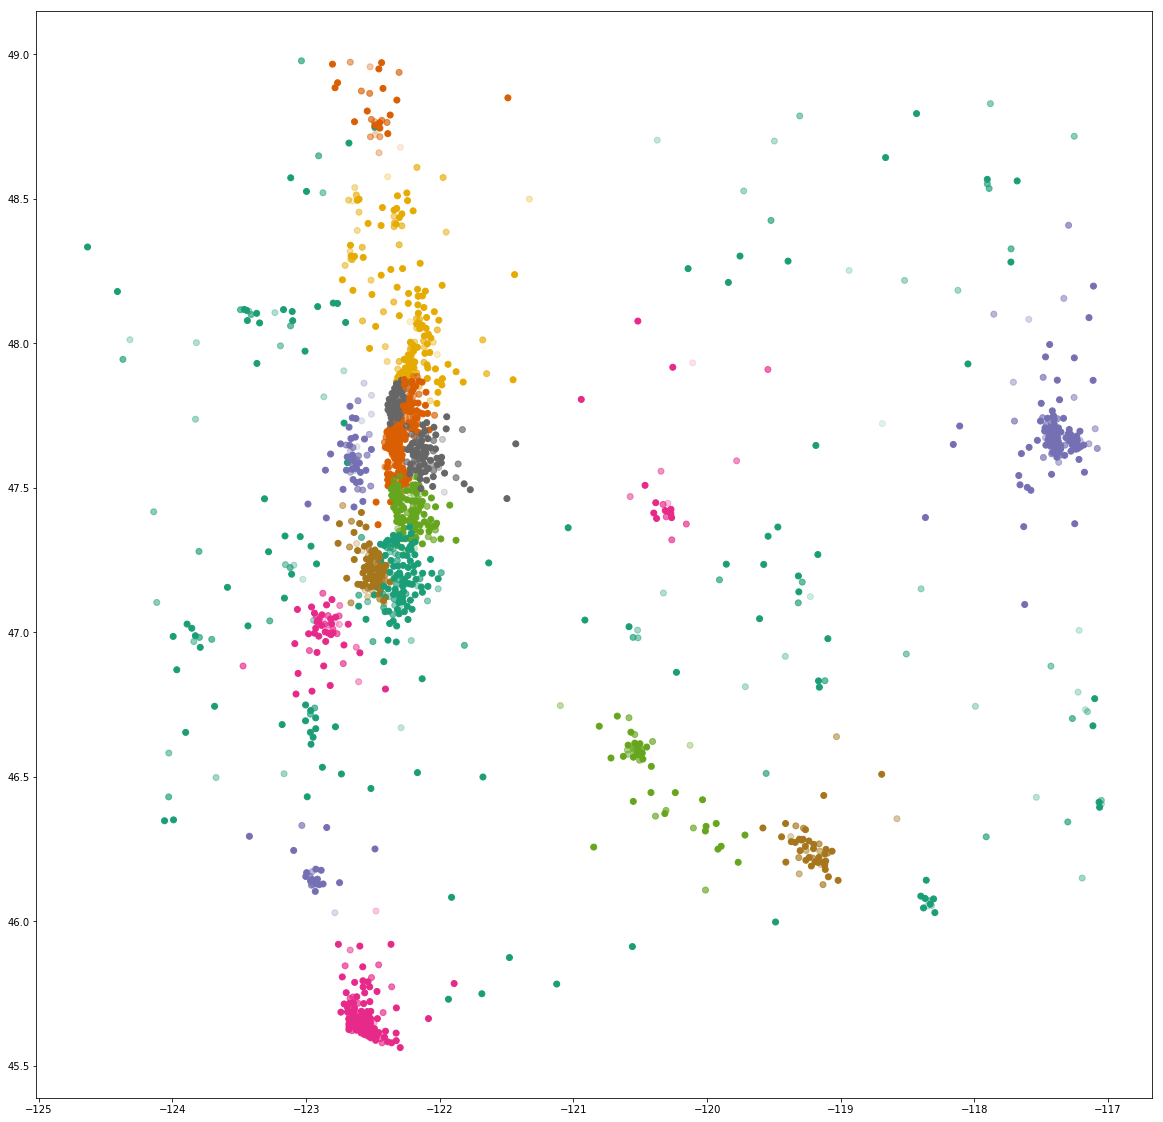

In [8]:
plot_state('WA', dist_method='absolute', link_method='ward', k=20, alpha=2)

In [ ]:
df_merged, df_tracts = get_commute_dfs()
# Limits view to bay area
df_area= limit_area(df_merged,minlat=46.5, maxlat=48.5, minlong = -123.5, maxlong=-121.5)
# Clusters and plots given kwargs
df_results = cluster_and_plot(df_area, df_tracts, dist_method='absolute', link_method='ward', k=12, alpha=2, cmap=cm.Dark2, cnum=8)

df_area_colored = df_area.merge(df_results,how='left',left_on='GEOID_O',right_on='GEOID')
flow_max = df_area_colored['FLOW'].max()
n = 1000
am = 10
for i, row in df_area_colored.sample(n).iterrows():
    rgb = (row['r'], row['g'], row['b'])
    plt.plot((row['INTPTLONG_O'],row['INTPTLONG_D']),(row['INTPTLAT_O'],row['INTPTLAT_D']), alpha=am*(row['FLOW']/flow_max), color=rgb)

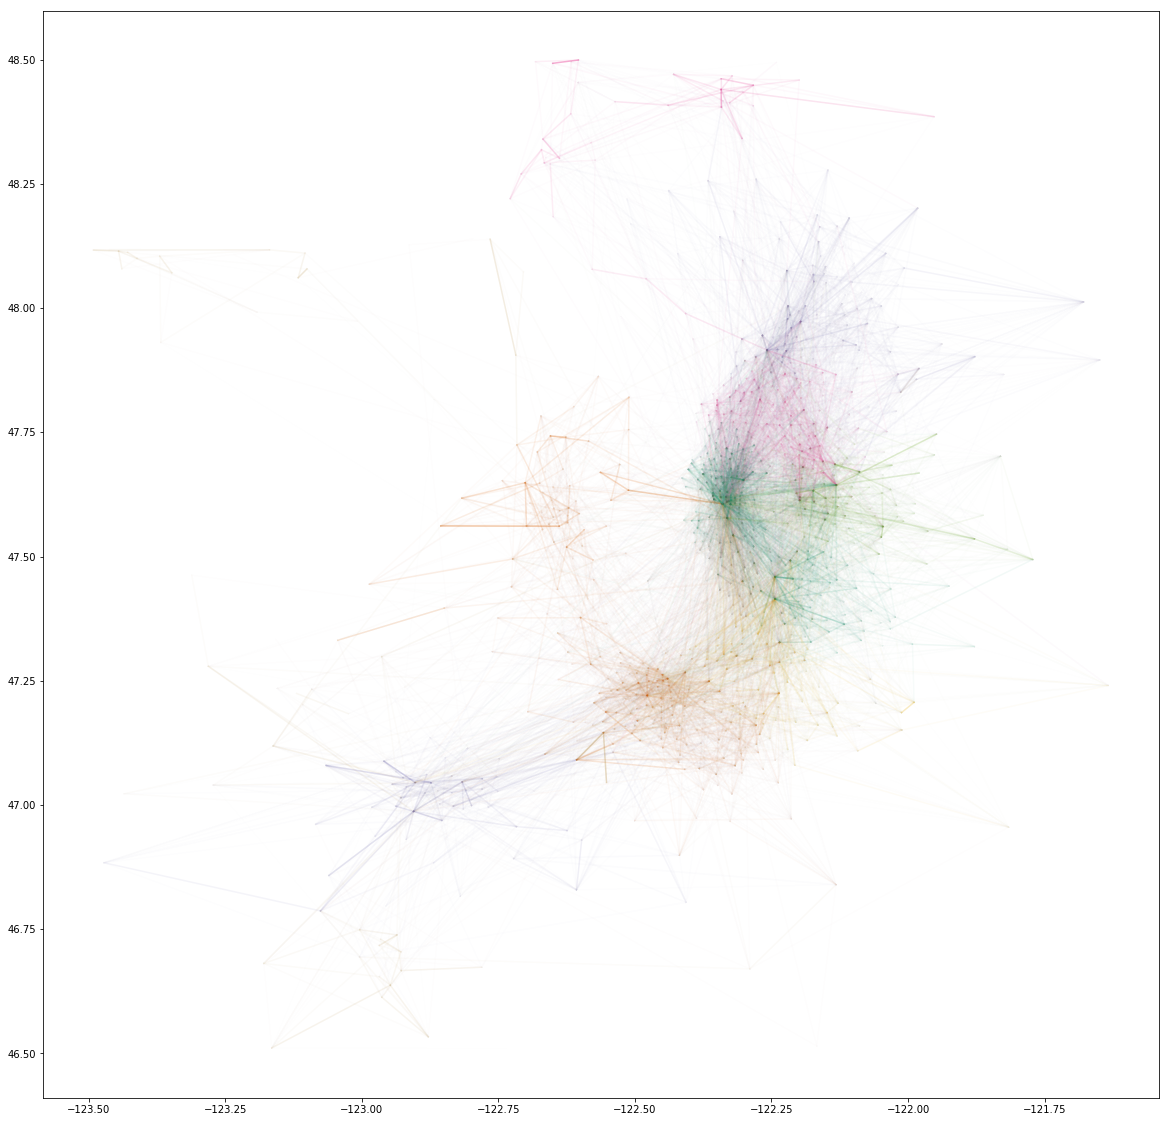

In [28]:
df_area_colored = df_area.merge(df_results,how='left',left_on='GEOID_O',right_on='GEOID')
flow_max = df_area_colored['FLOW'].max()
n = 10000
am = 10
for i, row in df_area_colored.sample(n).iterrows():
    rgba = (row['r'], row['g'], row['b'], am*row['alpha'])
    plt.plot((row['INTPTLONG_O'],row['INTPTLONG_D']),(row['INTPTLAT_O'],row['INTPTLAT_D']), alpha=(row['FLOW']/flow_max), color=rgba)


In [ ]:
# Use google maps api
gmaps.configure(api_key=api_key) # Fill in with your API key
#Set up your map
fig = gmaps.figure()
colors = list(df_results['color'].values)
locations = list(zip(df_results['INTPTLAT'],df_results['INTPTLONG']))
symbols = gmaps.symbol_layer(
        locations,
        fill_color=colors,
        stroke_color=colors,
        scale=2)
fig.add_layer(symbols)
fig.show()